## NYC Taxi Fare Prediction using Exploratory Data Analysis and Machine Learning

Source Dataset: https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs/about_data  
Data Provided By: Taxi and Limousine Commission (TLC)  
Dataset Owner: NYC OpenData  
  
**Objective:** Based on 2017 Yellow Taxi Trip Data, we want to -  
    - Draw insights about data hygiene, relationships between variables and any abnormalities.  
    - Identify and create a model to estimate Yellow Taxi fare for passengers, expected in 2018.

### Initiation

#### Import libraries

In [2]:
# Basic imports for data analysis
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_columns', None)

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing libraries for data modeling
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm


#### Review Data

In [3]:
# Load dataset
df_original= pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df_original.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# Variable overview
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Observations**:
- Compared to the original dataset, which contains 113M records, we are working with a smaller subset of the data with 22,699 records as part of practice.  
- The column 'Unnamed: 0' has not been mentioned in the data dictionary and is likely to random no. generated as index.
- Columns 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' are date/time variables, which would need to be converted to the correct format.

In [5]:
# Summary statistics
df_original.describe(include= 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,04/15/2017 6:05:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


**Observations**:
- There seems to be outlying values for fare_amount, trip_distance, total_amount etc. as the max. value of ~1000 USD is much higher than the mean.
- We have negative values in variables fare_amount, exttra etc.

Based on our observations from above, we can plan our EDA approach as below:
- Data Cleaning
    - Check/eliminate/deal with duplicates
    - Check/eliminate/deal with Nulls
    - Modify columns as needed
    - Identify outliers, isolate to assess how to deal with them
    - Check for incorrect values

- Draw insights from variables
    - Derive 'trip_duration' column based on date/time values provided
    - Can trip distance and trip duration be correlated so we keep just one?
    - Does the data sample capture all kind of rate code IDs? Any weird values?
    - Assess if there's any impact on fare amount during rush hours in morning and evening.
    - Is there any variance in nos. observed between different data providers (vendor ID)?
    - Which payment type has been used mostly? For similar trip distance/duration, is there any impact of payment type on fare amount?

### Exploratory Data Analysis

#### Data Cleaning

In [6]:
# Check for duplicates
df_original[df_original.duplicated()]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


In [7]:
# Check for Nulls
df_original.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

No rows were found to be duplicated and no columns have null values.

In [8]:
# Remove column 'Unnamed: 0' as there is no context provided about the data
df_edit= df_original.drop(columns= ['Unnamed: 0'])
df_edit.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [9]:
# # Correct format for date time columns
df_edit['tpep_pickup_datetime'] = pd.to_datetime(df_edit['tpep_pickup_datetime'])
df_edit['tpep_dropoff_datetime'] = pd.to_datetime(df_edit['tpep_dropoff_datetime'])

# Rename date time columns
df_edit= df_edit.rename(columns= {'tpep_pickup_datetime':'pickup_datetime'})
df_edit= df_edit.rename(columns= {'tpep_dropoff_datetime':'dropoff_datetime'})

df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   pickup_datetime        22699 non-null  datetime64[ns]
 2   dropoff_datetime       22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [10]:
# Creating a trip duration column to make more sense of pickup and dropoff times
df_edit['trip_duration']= round((df_edit['dropoff_datetime'] - df_edit['pickup_datetime'])/np.timedelta64(1,'m'),3)

# Creating columns to extract month and date for each trip
df_edit['month']= df_edit['pickup_datetime'].dt.month_name().str.slice(stop= 3)
df_edit['day']= df_edit['pickup_datetime'].dt.day_name().str.slice(stop= 3)

df_edit.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.067,Mar,Sat
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500,Apr,Tue
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200,Dec,Fri
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250,May,Sun
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.717,Apr,Sat


Checking for outliers

In [11]:
df_edit.describe()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013776
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983000
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183000
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996481


Based on the range of values for each variable as we see above, we'll check the following ones for distribution: -
- Trip Distance
- Fare Amount
- Extra
- Tip Amount
- Tolls Amount
- Trip Duration

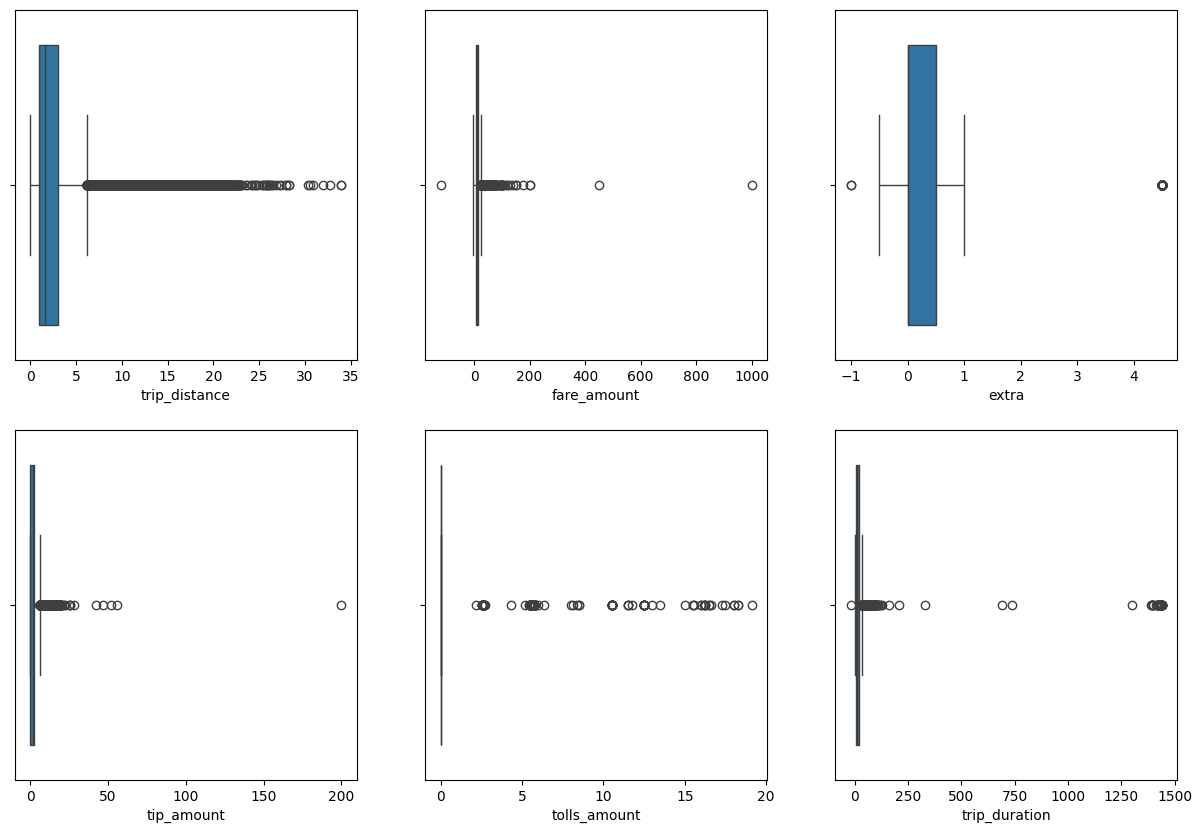

In [12]:
# Box Plot for the variables mentioned above
fig, axes = plt.subplots(2,3, figsize= (15,10))

sns.boxplot(x= df_edit['trip_distance'], ax= axes[0,0])
sns.boxplot(x= df_edit['fare_amount'], ax= axes[0,1])
sns.boxplot(x= df_edit['extra'], ax= axes[0,2])
sns.boxplot(x= df_edit['tip_amount'], ax= axes[1,0])
sns.boxplot(x= df_edit['tolls_amount'], ax= axes[1,1])
sns.boxplot(x= df_edit['trip_duration'], ax= axes[1,2])

plt.show()

*Key Observations*:
- trip_distance is generally between 0-5 miles, however, there seems to be a lot of extreme outlier values. Similarly for fare_amount, tip_amount, and trip_duration.
- We have negative values for fare_amount, extra, and possibly also trip duration. 

In [13]:
# Identify outliers for trip distance
tripdist_25 = df_edit['trip_distance'].quantile(0.25)
tripdist_75 = df_edit['trip_distance'].quantile(0.75)

iqr_tripdist = tripdist_75 - tripdist_25

tripdist_ll = tripdist_25 - (1.5 * iqr_tripdist)
tripdist_ul = tripdist_75 + (1.5 * iqr_tripdist)

print('Trip Distance Upper Limit:', '%.3f'% tripdist_ul)
print('Trip Distance Lower Limit:', '%.3f'% tripdist_ll)

Trip Distance Upper Limit: 6.165
Trip Distance Lower Limit: -2.115


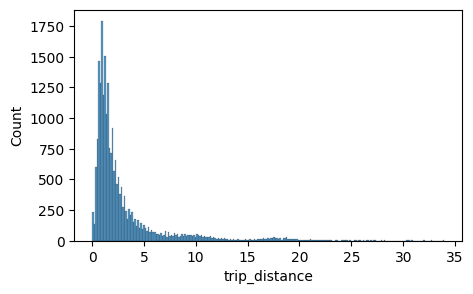

In [14]:
# Plotting histogram for distribution of trip distance
plt.figure(figsize=(5,3))
sns.histplot(df_edit['trip_distance'])
plt.show()

The distribution of values for trip distance is skewed to the right. Hence causing a negative value for lower limit of outliers. We'll consider the following limits:
Lower Limit: 0  
Upper Limit: 6.165  
We'll check what percentage of records classify as outliers. 

In [15]:
# Create a mask for outliers
mask_tripdist= (df_edit['trip_distance'] < 0) | (df_edit['trip_distance'] > tripdist_ul)
df_edit[mask_tripdist].shape[0]/df_edit.shape[0] * 100

11.132649015375126

In [16]:
# Rows having 0 as trip distance
df_edit[df_edit['trip_distance'] == 0].shape

(148, 20)

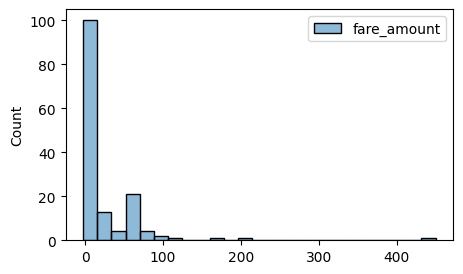

In [17]:
plt.figure(figsize= (5,3))
sns.histplot(df_original[df_original['trip_distance'] == 0][['fare_amount']])
plt.show()

In [18]:
# Second least value for trip distance
tripdist_min= np.sort(df_edit['trip_distance'].unique())[1]
tripdist_min

np.float64(0.01)

There are about 11% records wherein the trip distance is an outlying value. Instead of deleting records, we'll assign a value equal to lower or high limit, as applicable.
We also notice rows wherein trip distance= 0, most of these have very low fare amount. As this doesn't make sense, we'll use the second least value of 0.01

In [19]:
# Impute second minimum value for trip distance 0
df_edit['trip_distance'] = np.where(df_edit['trip_distance'] == 0, tripdist_min, df_edit['trip_distance'])
df_edit[df_edit['trip_distance'] == 0].shape

(0, 20)

In [20]:
# Function to assign upper and lower limit values to outliers
def clean_outlier(data, col):
    ''' 
    The function will find upper and lower limit using:
    Lower Limit = 25th Percentile - (1.5 * I.Q.R)
    Upper Limit = 75th Percentile + (1.5 * I.Q.R)
    
    Arguments:
    data: DataFrame used
    col: Column name to be cleaned (text)
    '''
    col_25 = data[col].quantile(0.25)
    col_75 = data[col].quantile(0.75)

    col_iqr = col_75 - col_25

    col_ll = col_25 - (1.5 * col_iqr)
    col_ul = col_75 + (1.5 * col_iqr)

    data[col] = np.where(data[col] < col_ll, col_ll, data[col])
    data[col] = np.where(data[col] > col_ul, col_ul, data[col])

    print('25th Percentile:','%.3f'%col_25)
    print('75th Percentile:','%.3f'%col_75)
    print('Lower Limit:','%.3f'%col_ll)
    print('Upper Limit:','%.3f'%col_ul)

    return    data[col] 


In [21]:
# Clean Trip Distance Outliers
df_edit1 = df_edit.copy()
clean_outlier(df_edit1, 'trip_distance')

print('Shape of modified DF:',df_edit1[df_edit1['trip_distance'] > tripdist_ul].shape)
print('Trip dist max. value:', '%.3f'% df_edit1['trip_distance'].max())

25th Percentile: 0.990
75th Percentile: 3.060
Lower Limit: -2.115
Upper Limit: 6.165
Shape of modified DF: (0, 20)
Trip dist max. value: 6.165


In [22]:
# Records with negative fare amount
df_edit1[df_edit1['fare_amount'] < 0].shape

(14, 20)

We'll run the clean_outlier function to assign limiting values to outliers.

In [23]:
# Clean Fare Amount Outliers
df_edit2 = df_edit1.copy()
clean_outlier(df_edit2, 'fare_amount')
print('')
print('Fare amount max. value:', '%.3f'% df_edit2['fare_amount'].max())
print('Fare amount min. value:', '%.3f'% df_edit2['fare_amount'].min())
print('Rows with negative fare:',df_edit2[df_edit2['fare_amount'] < 0].shape[0])

25th Percentile: 6.500
75th Percentile: 14.500
Lower Limit: -5.500
Upper Limit: 26.500

Fare amount max. value: 26.500
Fare amount min. value: -5.500
Rows with negative fare: 14


We'll replace negative values for fare to 0.

In [24]:
# Remove negative fare amount value with 0
df_edit2['fare_amount'] = np.where(df_edit2['fare_amount'] < 0, 0, df_edit2['fare_amount'])
print('Rows with negative fare:',df_edit2[df_edit2['fare_amount'] < 0].shape[0])

Rows with negative fare: 0


We'll perform a similar assessment for trip duration

In [25]:
df_edit3 = df_edit2.copy()
clean_outlier(df_edit3, 'trip_duration')
print('')
print('Trip Duration max. value:', '%.3f'% df_edit3['trip_duration'].max())
print('Trip Duration min. value:', '%.3f'% df_edit3['trip_duration'].min())
print('Rows with negative duration:',df_edit3[df_edit3['trip_duration'] < 0].shape[0])

25th Percentile: 6.650
75th Percentile: 18.383
Lower Limit: -10.949
Upper Limit: 35.983

Trip Duration max. value: 35.983
Trip Duration min. value: -10.949
Rows with negative duration: 1


In [26]:
df_edit3[df_edit3['trip_duration'] < 0]

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
9356,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,3,26.5,0.5,0.5,0.0,0.0,0.3,29.3,-10.9495,Nov,Sun


As there is just one row with a negative value, we'll impute a median value (derived from trip distance) for this record.

In [27]:
# Impute median value for negative trip duration
trip_dur_med= df_edit3[(df_edit3['trip_distance'] < 5.9) & (df_edit3['trip_distance'] > 5.5)]['trip_duration'].median()
print('Median trip duration for trip with distance between 5 to 6 miles:',trip_dur_med)

df_edit3['trip_duration'] = np.where(df_edit3['trip_duration'] < 0, trip_dur_med, df_edit3['trip_duration'])
print('Rows with negative duration:',df_edit3[df_edit3['trip_duration'] < 0].shape[0])

Median trip duration for trip with distance between 5 to 6 miles: 22.4835
Rows with negative duration: 0


We'll leave the variables extra, tip amount and toll amount for outlier assessment as they would not be used for basic fare prediction.

####  Draw Insights from Variables
- Derive 'trip_duration' column based on date/time values provided (*Created above*)
- Can trip distance and trip duration be correlated so we keep just one?
- Does the data sample capture all kind of rate code IDs? Any weird values?
- Assess if there's any impact on fare amount during rush hours in morning and evening.
- Is there any variance in nos. observed between different data providers (vendor ID)?
- Which payment type has been used mostly? For similar trip distance/duration, is there any impact of payment type on fare amount?

In [28]:
df_edit3.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.067,Mar,Sat
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500,Apr,Tue
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200,Dec,Fri
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250,May,Sun
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.717,Apr,Sat


##### Trip Distance vs. Duration

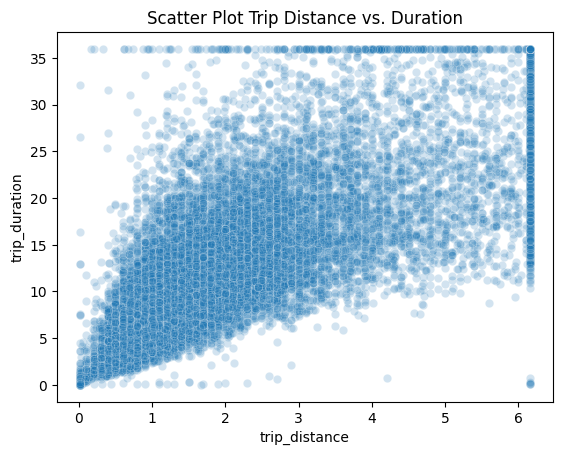

In [29]:
# Check for linear relationship between trip distance and duration
sns.scatterplot(
    data= df_edit3,
    x= 'trip_distance',
    y= 'trip_duration',
    alpha= 0.2
)

plt.title('Scatter Plot Trip Distance vs. Duration')
plt.show()

- There seems to be a linear relation between trip distance and duration, we may keep only one if we go for Multiple Linear Regression to avoid multi-collinearity.
- As we assigned limits to the outliers, they appear as concentrated on the edges of the scatter plot.

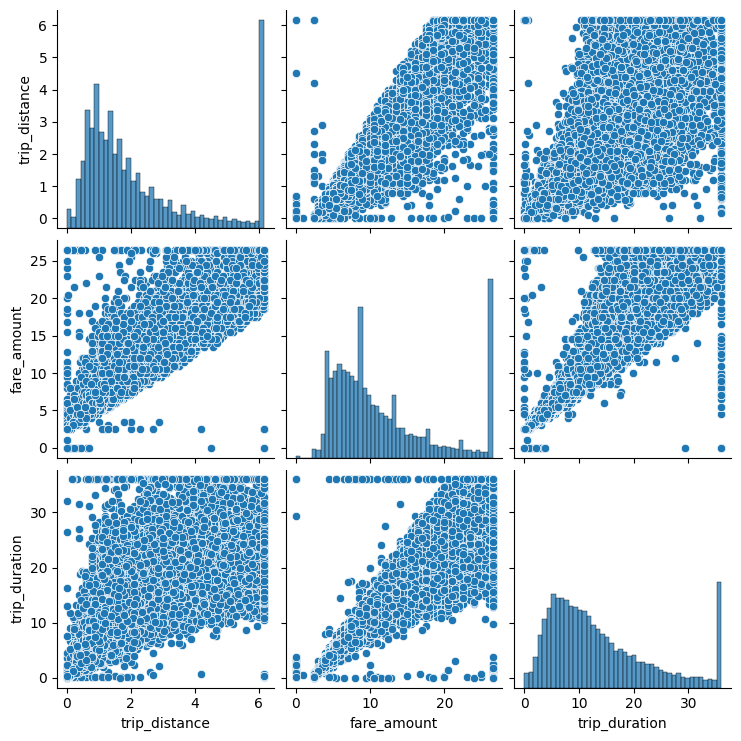

In [30]:
# Establish relationship between continuous variables
sns.pairplot(df_edit3[['trip_distance','fare_amount','trip_duration']])
plt.show()

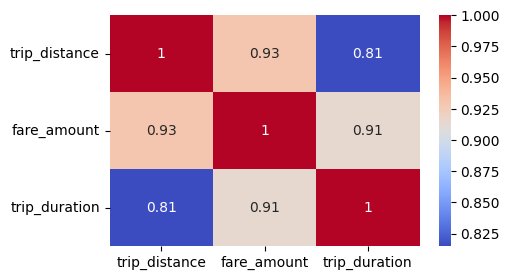

In [31]:
# Heatmap for continuous variables
corr= df_edit3[['trip_distance','fare_amount','trip_duration']].corr()
plt.figure(figsize=(5,3))
sns.heatmap(
    corr,
    annot= True,
    cmap= 'coolwarm'
)

plt.show()

All three continuous variables are linearly related to each other and each of them show a normal distribution which seems skewed to the right.

##### Rate Code

In [32]:
# Check range of values for Rate Code ID
print('Rate Code Values:',np.sort(df_edit3['RatecodeID'].unique()))
df_edit3['RatecodeID'].value_counts()

Rate Code Values: [ 1  2  3  4  5 99]


RatecodeID
1     22070
2       513
5        68
3        39
4         8
99        1
Name: count, dtype: int64

We don't have any records of Rate code = 'Group Ride', but the rest are there. 
From Data Dictionary:
>    1 = Standard rate  
>    2 = JFK  
>    3 = Newark  
>    4 = Nassau or Westchester  
>    5 = Negotiated fare  
>    6 = Group ride  
>    99 = Null/unknown

Importing Data for Taxi Pick-up and Drop-Off Zones

In [33]:
# Import Zone data
df_taxizone = pd.read_csv('taxi_zone_lookup.csv')
df_taxizone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [34]:
# Adding Pick-up zones
df_taxizone_PU= df_taxizone.copy()
df_taxizone_PU = df_taxizone_PU.rename(columns= {'LocationID': 'PULocationID','Zone':'PU_Zone'})
df_taxizone_PU= df_taxizone_PU.drop(columns= ['Borough','service_zone'], axis= 1)

df_edit4 = df_edit3.merge(df_taxizone_PU, on= 'PULocationID', how= 'left')

# Adding Drop-off zones
df_taxizone_DO= df_taxizone.copy()
df_taxizone_DO = df_taxizone_DO.rename(columns= {'LocationID': 'DOLocationID','Zone':'DO_Zone'})
df_taxizone_DO= df_taxizone_DO.drop(columns= ['Borough','service_zone'], axis= 1)
df_taxizone_DO.head()

df_edit4 = df_edit4.merge(df_taxizone_DO, on= 'DOLocationID', how= 'left')
df_edit4[df_edit4['PULocationID'] == 186].head()


,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day,PU_Zone,DO_Zone
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.5000,Apr,Tue,Penn Station/Madison Sq West,Central Park
66,2,2017-12-12 11:12:23,2017-12-12 12:01:01,1,3.10,1,N,186,263,1,26.5,0.0,0.5,5.76,0.0,0.3,34.56,35.9825,Dec,Tue,Penn Station/Madison Sq West,Yorkville West
95,2,2017-03-26 20:06:55,2017-03-26 20:14:43,1,1.46,1,N,186,233,1,7.0,0.5,0.5,1.24,0.0,0.3,9.54,7.8000,Mar,Sun,Penn Station/Madison Sq West,UN/Turtle Bay South
125,1,2017-12-18 19:21:19,2017-12-18 19:37:07,1,1.60,1,N,186,233,2,11.0,1.0,0.5,0.00,0.0,0.3,12.80,15.8000,Dec,Mon,Penn Station/Madison Sq West,UN/Turtle Bay South
148,1,2017-02-03 06:24:44,2017-02-03 06:30:49,1,1.10,1,N,186,186,3,6.0,0.0,0.5,0.00,0.0,0.3,6.80,6.0830,Feb,Fri,Penn Station/Madison Sq West,Penn Station/Madison Sq West


In [35]:
df_edit4.shape

(22699, 22)

In [36]:
df_edit4.groupby(['RatecodeID'])[['trip_distance','trip_duration','fare_amount']].mean().style.background_gradient()

,trip_distance,trip_duration,fare_amount
RatecodeID,,,
1,2.219391,13.213824,11.197349
2,5.698528,31.979123,26.500000
3,5.407179,28.465872,25.692308
4,6.165000,29.597438,26.500000
5,2.586103,13.064581,22.019412
99,0.010000,0.000000,26.500000


In [37]:
# Overview of pick-up/drop-off zones by rate code applied
print('Rate Code 2 Zones (first 5 records): \n',df_edit4[df_edit4['RatecodeID'] == 2][['PU_Zone','DO_Zone']].head())
print('')
print('Rate Code 3 Zones (first 5 records): \n',df_edit4[df_edit4['RatecodeID'] == 3][['PU_Zone','DO_Zone']].head())
print('')
print('Rate Code 4 Zones (first 5 records): \n',df_edit4[df_edit4['RatecodeID'] == 4][['PU_Zone','DO_Zone']].head())
print('')
print('Rate Code 5 Zones (first 5 records): \n',df_edit4[df_edit4['RatecodeID'] == 5][['PU_Zone','DO_Zone']].head())
print('')
print('Rate Code 6 Zones (first 5 records): \n',df_edit4[df_edit4['RatecodeID'] == 6][['PU_Zone','DO_Zone']].head())

Rate Code 2 Zones (first 5 records): 
                    PU_Zone        DO_Zone
11   Upper East Side North    JFK Airport
110            JFK Airport  Midtown North
161            JFK Airport    JFK Airport
247            JFK Airport   East Village
379            JFK Airport       Union Sq

Rate Code 3 Zones (first 5 records): 
                    PU_Zone               DO_Zone
63            Clinton East          Clinton East
128   TriBeCa/Civic Center  TriBeCa/Civic Center
176          Midtown North        Newark Airport
316            Murray Hill        Newark Airport
2478   Morningside Heights        Newark Airport

Rate Code 4 Zones (first 5 records): 
                  PU_Zone         DO_Zone
908    LaGuardia Airport  Outside of NYC
3138         JFK Airport  Outside of NYC
4715            Flatiron  Outside of NYC
9987   LaGuardia Airport  Outside of NYC
10291  LaGuardia Airport  Outside of NYC

Rate Code 5 Zones (first 5 records): 
                 PU_Zone                  DO_Zone


Observations:
- Standard Rates (Rate Code = 1) are used on shorter trips on average. Mostly around central NY.
- Special rate codes appy for JFK, Newark and Westchester, which are longer trips on average.
    - JFK Rates (Rate Code = 2) are most likely used on trips to or from JFK Airport. Generally these are longer trips than standard.
    - Newark Rates (Rate Code = 3) are most likely used on trips to or from Newark. Newark Airport included in this rate code.
    - Westchester rate code (Rate Code = 4) have zones mentioned outside of NYC, including trips from LaGuardia Airport.
- The Unknown rate code record has almost 0 trip distance and duration value, but has a fare of 26.5 USD, which seems inaccurate.

In [38]:
df_edit4[df_edit4['RatecodeID'] == 99]

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day,PU_Zone,DO_Zone
12501,1,2017-04-18 17:47:58,2017-04-18 17:47:58,0,0.01,99,N,264,264,1,26.5,0.0,0.5,0.0,0.0,0.3,78.0,0.0,Apr,Tue,NaN,NaN


In [39]:
# Remove record for Rate code 99
df_edit5 = df_edit4.drop([12501]).reset_index()
print(df_edit5.shape)
df_edit5[df_edit5['RatecodeID'] == 99]

(22698, 23)


,index,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day,PU_Zone,DO_Zone


In [40]:
df_edit5.head()

,index,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day,PU_Zone,DO_Zone
0,0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.067,Mar,Sat,Garment District,TriBeCa/Civic Center
1,1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500,Apr,Tue,Penn Station/Madison Sq West,Central Park
2,2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200,Dec,Fri,Yorkville East,Upper East Side North
3,3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250,May,Sun,Prospect-Lefferts Gardens,Fort Greene
4,4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.717,Apr,Sat,Alphabet City,Greenpoint


##### Rush/Off Hour

Creating a column to identify rush/off hour based on pick-up time.  
*Rush Hour Definition*:
- Morning Peak: From 7 a.m. till 10 a.m.
- Evening Peak: From 5 p.m. till 8 p.m.  

*Off Hour Definition*:
- From 12 a.m. till 5 a.m.

In [41]:
# Generate rush hour column
df_edit5['pick_hr'] = df_edit5['pickup_datetime'].dt.hour

df_edit5['rush_hr'] = np.where( ((df_edit5['pick_hr'] >= 7) & (df_edit5['pick_hr'] < 10)) | 
                               ((df_edit5['pick_hr'] >= 17) & (df_edit5['pick_hr'] < 20)), 1, 0)

# Generate off hour column
df_edit5['off_hr'] = np.where((df_edit5['pick_hr'] >= 0) & (df_edit5['pick_hr'] < 5), 1, 0)
df_edit5= df_edit5.drop(columns= ['pick_hr'])
df_edit5[df_edit5['rush_hr'] == 1].head()

,index,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day,PU_Zone,DO_Zone,rush_hr,off_hr
0,0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.340,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.0670,Mar,Sat,Garment District,TriBeCa/Civic Center,1,0
2,2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.000,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.2000,Dec,Fri,Yorkville East,Upper East Side North,1,0
6,6,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,6.165,1,N,79,241,1,26.5,1.0,0.5,9.86,0.00,0.3,59.16,35.9825,May,Wed,East Village,Van Cortlandt Village,1,0
7,7,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.980,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,21.9830,Aug,Tue,Upper East Side South,Greenwich Village South,1,0
11,11,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,6.165,2,N,236,132,1,26.5,0.0,0.5,14.58,5.54,0.3,72.92,35.9825,Mar,Sun,Upper East Side North,JFK Airport,1,0


In [42]:
df_edit5[df_edit5['off_hr'] == 1].head()

,index,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day,PU_Zone,DO_Zone,rush_hr,off_hr
19,19,2,2017-03-05 04:01:07,2017-03-05 04:14:11,2,2.770,1,N,79,68,1,11.5,0.5,0.5,3.20,0.0,0.3,16.00,13.0670,Mar,Sun,East Village,East Chelsea,0,1
23,23,1,2017-06-27 00:08:22,2017-06-27 00:13:45,1,1.700,1,N,162,263,1,7.0,0.5,0.5,2.05,0.0,0.3,10.35,5.3830,Jun,Tue,Midtown East,Yorkville West,0,1
26,26,1,2017-11-04 01:27:59,2017-11-04 01:44:05,1,2.700,1,N,50,263,1,13.0,0.5,0.5,2.85,0.0,0.3,17.15,16.1000,Nov,Sat,Clinton West,Yorkville West,0,1
35,35,2,2017-11-05 01:35:25,2017-11-05 01:43:39,5,2.690,1,N,24,48,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,8.2330,Nov,Sun,Bloomingdale,Clinton East,0,1
47,47,2,2017-01-13 02:37:24,2017-01-13 03:17:34,4,6.165,1,N,246,231,1,26.5,0.5,0.5,6.56,0.0,0.3,39.36,35.9825,Jan,Fri,West Chelsea/Hudson Yards,TriBeCa/Civic Center,0,1


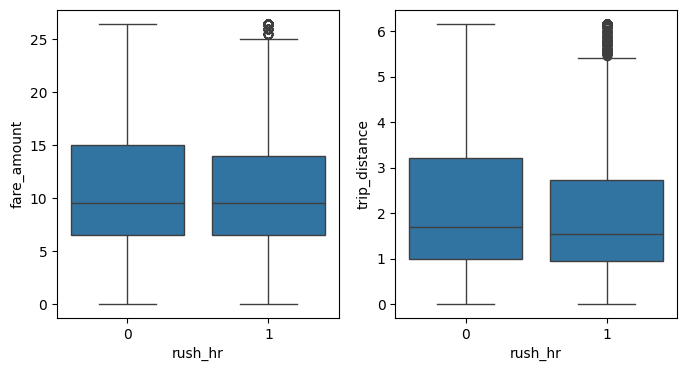

In [43]:
fig, axes= plt.subplots(1,2, figsize= (8,4))
sns.boxplot(
    data= df_edit5,
    y= 'fare_amount',
    x= 'rush_hr',
    ax= axes[0]
    )

sns.boxplot(
    data= df_edit5,
    y= 'trip_distance',
    x= 'rush_hr',
    ax= axes[1]
    )

plt.show()

We observe that during rush hour, trip distances have some outlier values, but median value for fare amount is almost the same as normal hours.

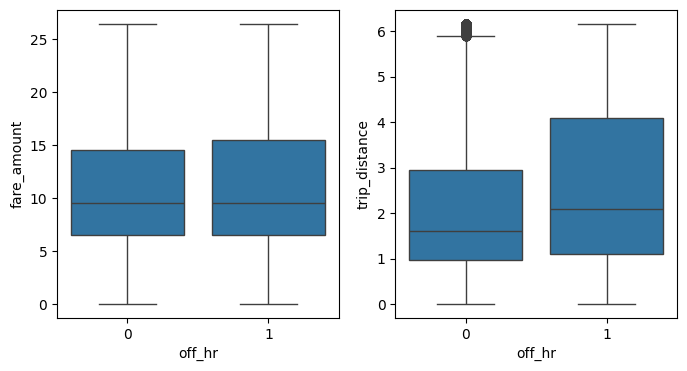

In [44]:
fig, axes= plt.subplots(1,2, figsize= (8,4))
sns.boxplot(
    data= df_edit5,
    y= 'fare_amount',
    x= 'off_hr',
    ax= axes[0]
    )

sns.boxplot(
    data= df_edit5,
    y= 'trip_distance',
    x= 'off_hr',
    ax= axes[1]
    )

plt.show()

Similarly, taxi fares during off hours are not significantly different than regular hours.

##### Vendor ID

In [45]:
# Variation in values based on source of data
mask_vend= (df_edit5['RatecodeID'] == 1) # Checking only on standard fares
vendid_assess= df_edit5[mask_vend][['VendorID','trip_distance','pickup_datetime','dropoff_datetime','fare_amount']]
vendid_assess.head()

,VendorID,trip_distance,pickup_datetime,dropoff_datetime,fare_amount
0,2,3.34,2017-03-25 08:55:43,2017-03-25 09:09:47,13.0
1,1,1.80,2017-04-11 14:53:28,2017-04-11 15:19:58,16.0
2,1,1.00,2017-12-15 07:26:56,2017-12-15 07:34:08,6.5
3,2,3.70,2017-05-07 13:17:59,2017-05-07 13:48:14,20.5
4,2,4.37,2017-04-15 23:32:20,2017-04-15 23:49:03,16.5


In [46]:
vendid_assess['dist_agg'] = pd.qcut(
    vendid_assess['trip_distance'], 4,
    labels= ['low','low-medium','high-medium','high']
    )
vendid_assess.head()

,VendorID,trip_distance,pickup_datetime,dropoff_datetime,fare_amount,dist_agg
0,2,3.34,2017-03-25 08:55:43,2017-03-25 09:09:47,13.0,high
1,1,1.80,2017-04-11 14:53:28,2017-04-11 15:19:58,16.0,high-medium
2,1,1.00,2017-12-15 07:26:56,2017-12-15 07:34:08,6.5,low-medium
3,2,3.70,2017-05-07 13:17:59,2017-05-07 13:48:14,20.5,high
4,2,4.37,2017-04-15 23:32:20,2017-04-15 23:49:03,16.5,high


C:\Users\Tirthankar Raha\AppData\Local\Temp\ipykernel_736\733364227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendid_assess_plot= vendid_assess.groupby(['dist_agg','VendorID'])[['fare_amount']].mean().reset_index()


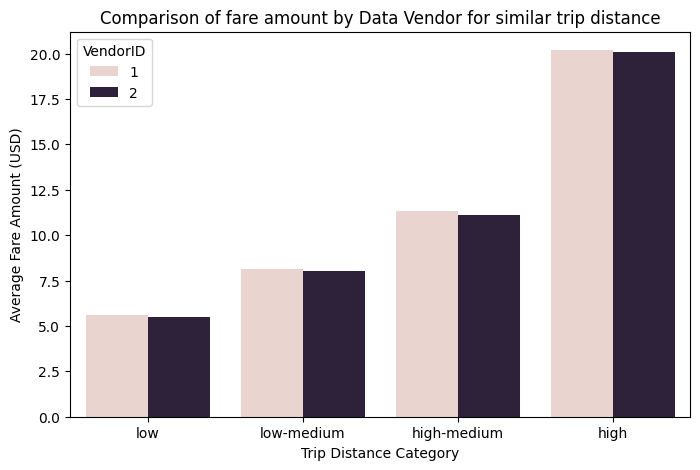

In [47]:
vendid_assess_plot= vendid_assess.groupby(['dist_agg','VendorID'])[['fare_amount']].mean().reset_index()

plt.figure(figsize= (8,5))
sns.barplot(
    data= vendid_assess_plot,
    x= 'dist_agg',
    y= 'fare_amount',
    hue = 'VendorID'
)
plt.xlabel('Trip Distance Category')
plt.ylabel('Average Fare Amount (USD)')
plt.title('Comparison of fare amount by Data Vendor for similar trip distance')
plt.show()

We don't seem to have a significant difference in fare amount between the 2 data sources, for any of the trip distance category (slightly lower values for vendor id= 2).

##### Payment Type

In [48]:
df_edit5['payment_type'].value_counts()

payment_type
1    15264
2     7267
3      121
4       46
Name: count, dtype: int64

    0= Flex Fare trip
    1= Credit card
    2= Cash
    3= No charge
    4= Dispute
    5= Unknown
    6= Voided trip

According to the dictionary, most of the payments have been made using credit card (15,264), followed by cash payments (7267). We don't have records of any 'Unknown' or 'Voided trip' payment types.

In [49]:
# Checking fare amount values in payment types 3 and 4
print(df_edit5[df_edit5['payment_type'] == 3][['payment_type','fare_amount']].head())
print(df_edit5[df_edit5['payment_type'] == 4][['payment_type','fare_amount']].head())

     payment_type  fare_amount
147             3         11.0
148             3          6.0
270             3         18.5
314             3          0.0
319             3          2.5
      payment_type  fare_amount
289              4          5.5
1662             4         13.5
1882             4         20.5
2531             4          8.5
3348             4          6.0


We see that even for 'No charge' or 'Dispute' payment types, we do have fare_amount values.

In [50]:
# Variation in fare_amount based on payment_type
pt_assess= df_edit5[df_edit5['RatecodeID'] == 1][['payment_type','trip_distance','fare_amount']]

pt_assess['dist_agg'] = pd.qcut(
    pt_assess['trip_distance'], 4,
    labels= ['low','low-medium','high-medium','high']
    )
pt_assess.head()

,payment_type,trip_distance,fare_amount,dist_agg
0,1,3.34,13.0,high
1,1,1.80,16.0,high-medium
2,1,1.00,6.5,low-medium
3,1,3.70,20.5,high
4,2,4.37,16.5,high


In [51]:
# Checking distribution of fare amount by trip distance and payment type for 'high' trip distance
px.scatter(
    pt_assess[pt_assess['dist_agg'] == 'high'],
    x= 'trip_distance',
    y= 'fare_amount',
    color= 'payment_type',
    opacity= 0.5,
    color_discrete_sequence= px.colors.qualitative.Set1 
)


There isn't a specific pattern to fare_amount by payment_type. We have records of credit card and cash payments across the spectrum.

#### EDA Sumary of Observations

1. Data Cleaning:
    - No records found to be duplicated or containing Null values.
    - Extreme outliers observed for trip distance, trip duration, and fare amount. Negative values found for fare amount, trip duration.
    - Records with trip distance as 0 have been imputed with a min. value of 0.01.
    - Cleaned outliers for trip distance, duration and fare amount.
    - Variables extra, tip amount and toll amount excluded from outlier assessment as they would not be used for basic fare prediction.
2. Data Insights:
    - Trip Duration, derived from pick-up and drop-off time, is highly correlated to trip distance and would not provide any additional value to prediction of fare_amount. We can exclude it from our predictor variables. Trip distance is linearly correlated to fare_amount.
    - Special rate codes appy for JFK, Newark and Westchester, which are longer trips on average. Removed record for Unknown rate code as it has almost 0 trip distance and duration value, but has a fare of 26.5 USD, which seems inaccurate.
    - Slight variance in prices observed between rush/off hours vs. regular hours. May not be a strong indicator, but can be included for model accuracy.
    - No major variance found in fare_amount based on Vendor ID and Payment Type.

### Model Build and Initial Assessment

#### Model Building

##### Data Preparation

In [52]:
# Remove column index
model_data = df_edit5.drop(columns= ['index','extra','mta_tax','tip_amount',
                                     'tolls_amount','improvement_surcharge','total_amount','trip_duration',
                                     'pickup_datetime','dropoff_datetime','PU_Zone','DO_Zone'], axis= 1)
model_data.head()


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,month,day,rush_hr,off_hr
0,2,6,3.34,1,N,100,231,1,13.0,Mar,Sat,1,0
1,1,1,1.80,1,N,186,43,1,16.0,Apr,Tue,0,0
2,1,1,1.00,1,N,262,236,1,6.5,Dec,Fri,1,0
3,2,1,3.70,1,N,188,97,1,20.5,May,Sun,0,0
4,2,1,4.37,1,N,4,112,2,16.5,Apr,Sat,0,0


The above data table should include the most likely variables to impact fare_amount. We'll use the following initial predictor variables to see the performance:  
- trip_distance (continuous)
- rush_hr (categorical)
- passenger_count (categorical)
- month (categorical)
- day (categorical)

Outcome Variable: fare_amount (continuous)

In [63]:
# Setup initial model dataframe
model_data1= model_data[['trip_distance','rush_hr','passenger_count','month','day','fare_amount']]
model_data1.head()

,trip_distance,rush_hr,passenger_count,month,day,fare_amount
0,3.34,1,6,Mar,Sat,13.0
1,1.80,0,1,Apr,Tue,16.0
2,1.00,1,1,Dec,Fri,6.5
3,3.70,0,1,May,Sun,20.5
4,4.37,0,1,Apr,Sat,16.5


In [64]:
# Prepare training and testing data
y = model_data1[['fare_amount']]

X= model_data1.drop(columns= ['fare_amount'], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)
X_train.shape

(15888, 5)

##### Initiate and Build OLS Model

In [66]:
ols_formula= 'fare_amount ~ trip_distance + C(rush_hr) + C(passenger_count) + C(month) + C(day)'

ols_data= pd.concat([X_train,y_train], axis= 1)

In [67]:
# Fit the model
ols = ols(formula= ols_formula, data= ols_data)
model= ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     4094.
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:36:19   Log-Likelihood:                -36935.
No. Observations:               15888   AIC:                         7.392e+04
Df Residuals:                   15862   BIC:                         7.412e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.6194      0.504      7.180      0.000       2.631       4.608
C(rush_hr)[T.1]             0.2960      0.043      6.954      0.000       0.213       0.379
C(passenger_count)[T.1]    -0.0638      0.497     -0.128      0.898      -1.037       0.910
C(passenger_count)[T.2]     0.0532      0.499      0.107      0.915      -0.925       1.031
C(passenger_count)[T.3]     0.0181      0.505      0.036      0.971      -0.972       1.009
C(passenger_count)[T.4]     0.1176      0.515      0.228      0.819      -0.892       1.128
C(passenger_count)[T.5]    -0.1790      0.504     -0.355      0.722      -1.167       0.809
C(passenger_count)[T.6]    -0.1637      0.510     -0.321      0.748      -1.162       0.835
C(month)[T.Aug]            -0.1122      0.097     -1.152      0.249      -0.303       0.079
C(month)[T.Dec]             0.4002      0.095      4.229      0.000       0.215       0.586
C(month)[T.Feb]            -0.0880      0.097     -0.911      0.362      -0.277       0.101
C(month)[T.Jan]            -0.1436      0.094     -1.534      0.125      -0.327       0.040
C(month)[T.Jul]            -0.0082      0.098     -0.084      0.933      -0.200       0.184
C(month)[T.Jun]             0.2693      0.094      2.873      0.004       0.086       0.453
C(month)[T.Mar]             0.1736      0.094      1.853      0.064      -0.010       0.357
C(month)[T.May]             0.1693      0.094      1.804      0.071      -0.015       0.353
C(month)[T.Nov]             0.3191      0.096      3.315      0.001       0.130       0.508
C(month)[T.Oct]             0.2204      0.093      2.362      0.018       0.038       0.403
C(month)[T.Sep]             0.1061      0.098      1.085      0.278      -0.085       0.298
C(day)[T.Mon]              -0.4403      0.075     -5.907      0.000      -0.586      -0.294
C(day)[T.Sat]              -0.4184      0.072     -5.814      0.000      -0.559      -0.277
C(day)[T.Sun]              -0.7995      0.074    -10.778      0.000      -0.945      -0.654
C(day)[T.Thu]               0.0709      0.071      0.993      0.321      -0.069       0.211
C(day)[T.Tue]               0.0115      0.072      0.159      0.874      -0.131       0.154
C(day)[T.Wed]               0.0173      0.071      0.243      0.808      -0.122       0.157
trip_distance               3.4846      0.011    319.099      0.000       3.463       3.506
==============================================================================
Omnibus:                    10558.437   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398349.207
Skew:                           2.676   Prob(JB):                         0.00
Kurtosis:                      26.939   Cond. No.                         210.
====================

Observations:
- We get an R-squared value of 86.6%, which is quite good. This implies 86.6% of 

#### Model Assessment

#### Model Tuning and EDA

### Final Assessment and Summary